In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

#Introducción al uso de librerías

Algunas de las librerías más utilizadas son:

1.   [NumPy](https://numpy.org/doc/stable/numpy-ref.pdf)
2.   [Matplotlib](https://matplotlib.org/)
3.   [Pandas](https://pandas.pydata.org/docs/)

4.   [SciPy](https://docs.scipy.org/doc/scipy/)

# Numpy y Matplotlib
Numpy es una librería de procesamiento numérico que ofrece arrays y tipos de datos 'dtype' como datetime, facilita muchas operaciones relacionadas con vectores y matrices.

```python
numpy.array
```
$$\begin{bmatrix}a_0 & a_1 & a_2 & \dots & a_n\end{bmatrix}$$

Matplotlib es una librería que parmite hacer gráficas en python de forma sencilla, tiene múltiples tipos de gráficas como por ejemplo plot, scatter, bars, pie e incluso tipos especiales de grafica como boxplot o errorplot.

Suponga que quiere tener un conjunto de datos en un rango dado con un cierto número de divisiones, para ello existe una función llamada ```linspace```


```python
np.linspace(<número inicial>,<número final>,<divisíones>)
```

Una ventaja que poseen los arreglos es que pueden evaluarse al tiempo en una función y pueden operarse por posiciones.




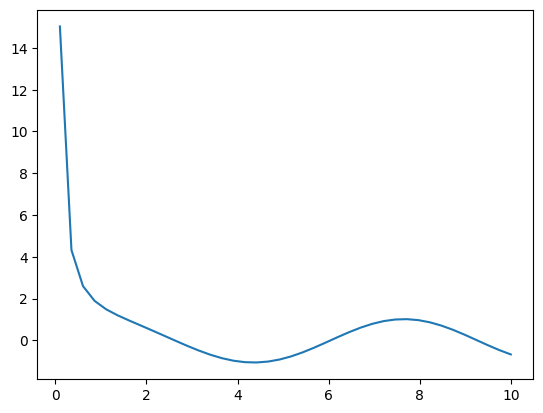

In [2]:

x=np.linspace(0.1,10,40)
y=lambda x: np.sin(x)+1.5*np.cos(x)/x
'''
Esto es equivalente a tener:
y_s=[]
for i in x:
  y_s.append(y(i))

solo que mucho más rápido ya que se trata de un array
'''


#Para graficarlo con matplotlib se puede utilizar plor
plt.plot(x,y(x))

También es posible tratarlos como vectores ya que estos array poseen todas las propiedades de los mismos exceptuando el producto punto, el cual funciona bajo el simbolo @ en lugar de * pues este corresponde al producto hadamard.

In [3]:
notas=np.array([5,2,4,4])
valores=np.array([.5,.25,.2,.05])
print(notas*valores)#Producto hadamard
print(sum(notas*valores))# Suma de los elementos del vector
print(notas@valores)# producto punto

[2.5 0.5 0.8 0.2]
4.0
4.0


**Matrices**

Las matrices son arreglos de dos dimensiones o más, y pueden crearse de dos formas: con `np.matrix()` y `np.array()`

Las matrices tienen muchas funciones entre las cuales están la suma de matrices, multiplicación matricial, la inversión de matrices y la trasposición de matrices


In [4]:
np.array([[2,0,-1],[3,1,-1],[0,5,-1]])

array([[ 2,  0, -1],
       [ 3,  1, -1],
       [ 0,  5, -1]])

(-0.14285714285714324, 5.857142857142857)

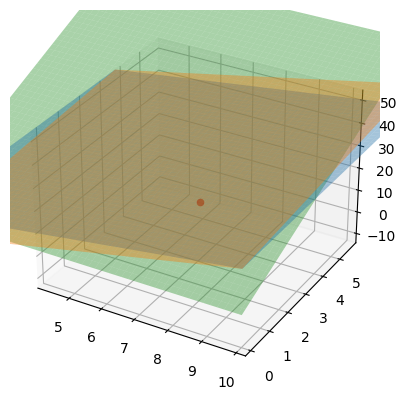

In [5]:
x=np.linspace(0,10,100)
X,Y=np.meshgrid(x,x)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, 2*X,alpha=0.4)
ax.plot_surface(X, Y, 3*X+Y-10,alpha=0.4)
ax.plot_surface(X, Y, 5*Y,alpha=0.4)
'''
Ecuaciones

z=2x
z=3x+y-10
z=5y


-z+2x=0
-z+3x+y=10
-z+5y=0
'''

s=np.array([
     [2,0,-1],
     [3,1,-1],
     [0,5,-1]
     ])
r=np.array([0,10,0])
q=np.linalg.solve(s,r)

ax.scatter3D(q[0],q[1],q[2],color="red")
ax.set_xlim(q[0]-3,q[0]+3)
ax.set_ylim(q[1]-3,q[1]+3)

###Funciones para obtener valores aleatórios

Con numpy se puede generar números aleatórios o escoger aleatóriamente entre los objetos de un arreglo



```python
np.random.randint(<límite inferior>, <límite superior>)
```

```python
np.random.choice(<arreglo>)
```


In [6]:
clases=["a","b","c"]
print(np.random.choice(clases))

print(np.random.randint(10,50))

c
21


##Numpy para estadística

Mínimo y máximo de un array

```python
<arreglo>.min()
<arreglo>.max()
```
Rango de un array

```python
<arreglo>.ptp()
```



In [ ]:
ingresos=np.array([np.random.randint(15,70)*100 for _ in range(300)])
print(ingresos)

In [10]:
print(ingresos.min())
print(ingresos.max())
print(ingresos.ptp())

1500
6900
5400


Se puede ordenar utilizando `sort()`



```python
<arreglo>.sort()
```



In [ ]:
ingresos.sort()
print(ingresos)

Con numpy también es muy sencillo obtener la frecúencia con `unique`
```python
np.unique(<arreglo>, return_counts=True)
```


In [ ]:
datos, conteo = np.unique(ingresos, return_counts=True)
print(datos)
print(conteo)

[1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800
 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200
 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600
 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900]
[ 5  3 10  3  2  4  5 10  4  4  8  6  2 14  2  7  7  7  6  5  5  9  8  5
  3  8  4 10  6 10  2  7  2  4  6  4  3  9  6  6  5  4  4  5  4  6  6  3
  3  2  5  6  4 10  2]


Se puede obtener medidas de tendencia central como la media utilizando


```python
<arreglo>.mean()
```



In [12]:
media=ingresos.mean()
print(media)

4139.0


Otra medida de tendencia central que puede ser obtenida facilmente es la mediana con
```
np.median(<arreglo>)
```



In [14]:
mediana=np.median(ingresos)
print(mediana)

4200.0


Moda

In [ ]:
ingreso, conteo=np.unique(ingresos, return_counts=True)
frecuencia=np.max(conteo)
moda=ingreso[conteo==frecuencia]
print(moda,frecuencia)

[2800] 14


Grafico

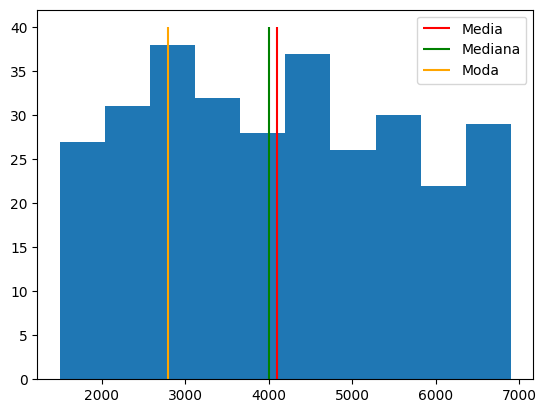

In [ ]:
plt.hist(ingresos)
plt.vlines(media,0,40,color="red",label="Media")
plt.vlines(mediana,0,40,color="green",label="Mediana")
plt.vlines(moda,0,40,color="orange",label="Moda")
plt.legend()

###Grafico de dispersion

Es un tipo de gáfica en la cual se colocan puntos en aquellos datos conocidos

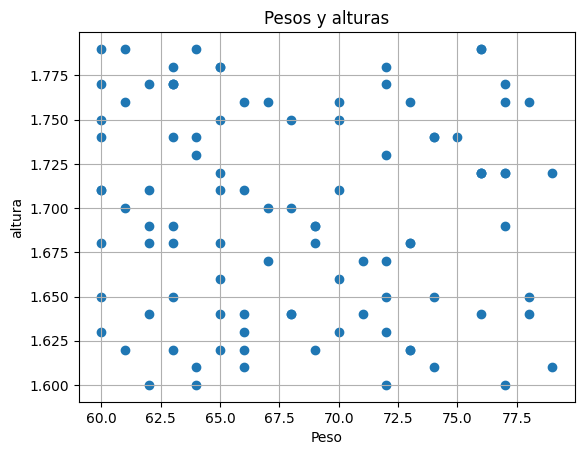

In [15]:
pesos=np.array([np.random.randint(60,80) for _ in range(100)])
alturas=np.array([np.random.randint(160,180)/100 for _ in range(100)])

plt.title("Pesos y alturas")
plt.xlabel("Peso")
plt.ylabel("altura")
plt.grid()
plt.scatter(pesos,alturas)

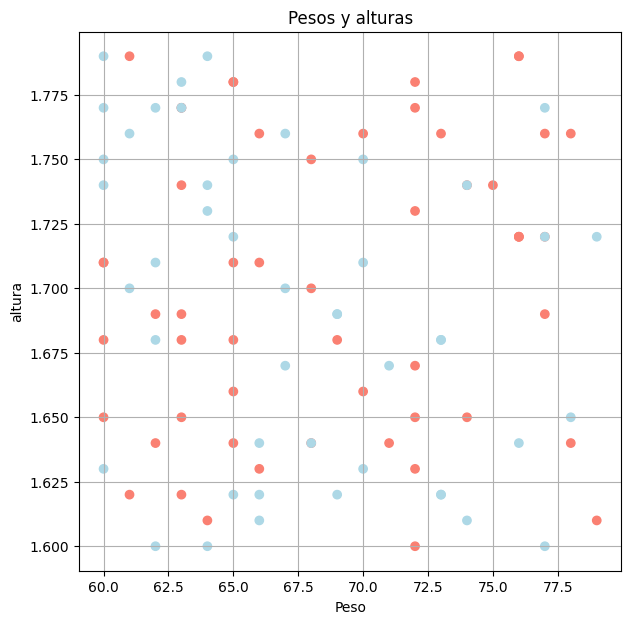

In [16]:
sexos=[ np.random.choice(["salmon","lightblue"]) for _ in range(100)]


plt.figure(figsize=(7,7))
plt.title("Pesos y alturas")
plt.xlabel("Peso")
plt.ylabel("altura")
plt.grid()


plt.scatter(pesos,alturas, color=sexos)

###Graficas de barras

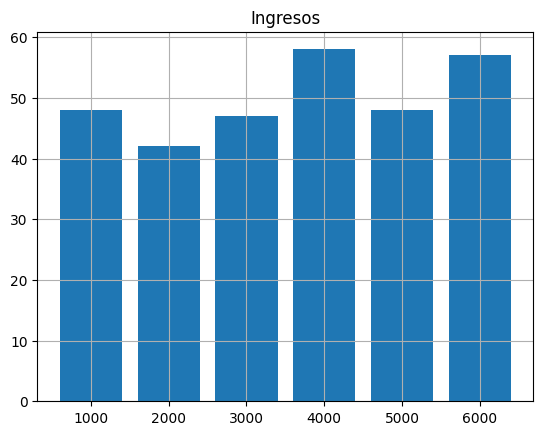

In [17]:
ingresos=np.array([np.random.randint(1,7)*1000 for _ in range(300)])

datos, conteo=np.unique(ingresos, return_counts=True)

plt.title("Ingresos")
plt.bar([str(i) for i in datos],conteo)
plt.grid()

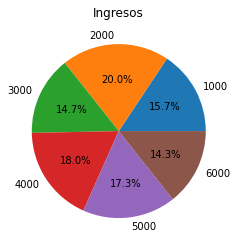

In [ ]:
ingresos=np.array([np.random.randint(1,7)*1000 for _ in range(300)])

datos, conteo=np.unique(ingresos, return_counts=True)

plt.title("Ingresos")
plt.pie(conteo, labels=[str(i) for i in datos],autopct='%1.1f%%')
plt.grid()

#Pandas

In [18]:
d=open("Datos.csv","w")
d.write("Altura,Peso\n")
for i in range(40):
  d.write(str(np.random.randint(160,180)/100)+","+str(np.random.randint(70,80))+"\n")
d.close()

###Obtencion de datos de un csv

In [ ]:
dat=pd.read_csv("Datos.csv",sep=',')
dat.head(-1)

In [20]:
dat.describe()

,Altura,Peso
count,40.000000,40.000000
mean,1.694500,75.075000
std,0.056065,3.007576
min,1.600000,70.000000
25%,1.650000,72.000000
50%,1.690000,76.000000
75%,1.740000,78.000000
max,1.790000,79.000000


In [21]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Altura  40 non-null     float64
 1   Peso    40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 768.0 bytes


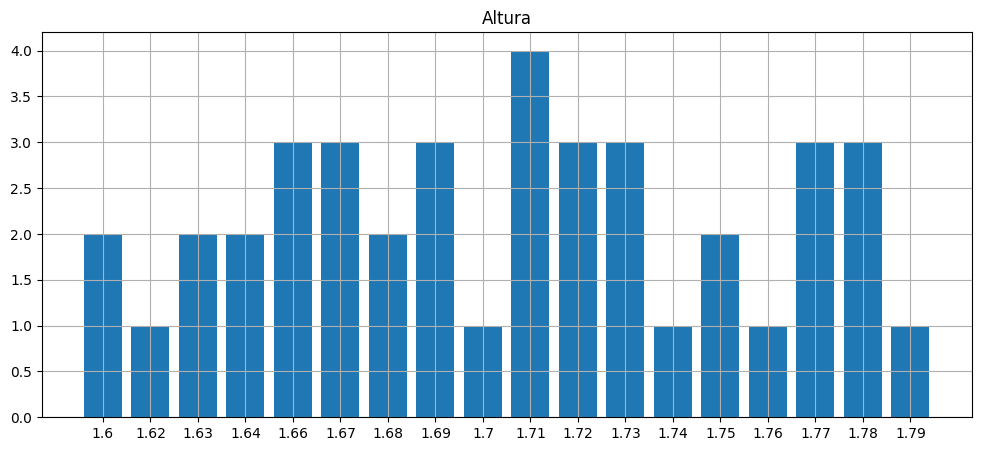

In [ ]:
datos, conteo=np.unique(dat["Altura"], return_counts=True)

plt.figure(figsize=(12,5))
plt.title("Altura")

plt.bar([str(i) for i in datos],conteo)

plt.grid()

###Creacion de dataframes

In [ ]:
ingresos=[np.random.randint(15,70)*100 for _ in range(50)]
integrantes=[np.random.randint(1,5) for _ in range(50)]

df=pd.DataFrame()
df.head()
df["Ingresos"]=ingresos
df["Integrantes"]=integrantes

df.head(-1)

In [ ]:
df.sort_values("Ingresos")

#Aplicación

##Ejemplo 1
Se han recolectado datos dentro de la empresa sobre los trabajadores, especificamente se tienen sus sexos, ingresos y cargos.

In [ ]:
#@title Datos
print("El dataset se llama datos y es data frame de pandas.")
v=np.array([np.random.randint(10,50) for _ in range(4)])
ing=[]
tag=[]
pst=[]
h1=[np.random.randint(10,20) for _ in range(4)]
h2=[np.random.randint(10,20) for _ in range(4)]
k=["Vendedor","Marketing","Gerente","Oficinista","Maquinario"]
for i in range(len(h1)):
  ing+=[v[i]]*h1[i]
  tag+=["H"]*h1[i]
  pst+=[k[i]]*h1[i]
for i in range(len(h2)):
  ing+=[v[i]]*h2[i]
  tag+=["M"]*h2[i]
  pst+=[k[i]]*h2[i]


datos=pd.DataFrame()
datos["sexo"]=tag
datos["ingresos"]=ing
datos["cargo"]=pst
datos

,sexo,ingresos,cargo
0,H,27,Vendedor
1,H,27,Vendedor
2,H,27,Vendedor
3,H,27,Vendedor
4,H,27,Vendedor
...,...,...,...
96,M,45,Oficinista
97,M,45,Oficinista
98,M,45,Oficinista
99,M,45,Oficinista


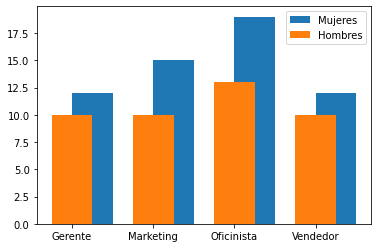

In [ ]:
M=datos[datos["sexo"]=="M"]
H=datos[datos["sexo"]=="H"]

labels,valores=np.unique(M["cargo"],return_counts=True)

plt.bar(labels,valores,label="Mujeres",width=.5,align="edge")
labels,valores=np.unique(H["cargo"],return_counts=True)
plt.bar(labels,valores,label="Hombres",width=.5)
plt.legend()
plt.show()

###Indicadores
Hay que tener cuidado cuando se hace una operación para sacar una conclusion pues si se hace mal la información pierde valor pues esta retratando un mundo imaginario, más no el mundo real.

un ejemplo seria con el mismo dataset restar los promedios o hacer el promedio de las diferencias de los promedios.

Estas dos son muy diferentes pues tratan diferentes contextos, el primero habla de un contexto global, mientras que el otro habla de un contexto más especifico para cada cargo.

In [ ]:
#diferencia de medias, hace el promedio salarial total y hace la resta entre las dos cantidades
print("Indicador 1: ", np.mean(M["ingresos"])-np.mean(H["ingresos"]))
#diferencia de las medias de las diferencias, hace el promedio salarial por cargo, luego hace las resta y lo vuelve a promediar
i1=np.array([np.mean(M[M["cargo"]==i]["ingresos"]) for i in ["Vendedor","Marketing","Gerente","Oficinista","Maquinario"]])
i2=np.array([np.mean(H[H["cargo"]==i]["ingresos"]) for i in ["Vendedor","Marketing","Gerente","Oficinista","Maquinario"]])
np.nan_to_num(i1,0)
np.nan_to_num(i2,0)
print("Indicador 2: ",np.mean(i1-i2))

Indicador 1:  -0.03448275862069039
Indicador 2:  0.0


#Ejemplo 2

Se le entrega un dataset en donde hay conjunto de puntos, determine cual es su relacion con respecto a X:

In [ ]:
#@title Datos
print("El dataset se llama datos y es data frame de pandas.")
datos=pd.DataFrame()
datos["X"]=np.arange(0,300)+(1-np.random.rand(300)/2)*100
datos["Y"]=np.arange(0,300)+(1-np.random.rand(300)/2)*100
datos

El dataset se llama datos y es data frame de pandas.


,X,Y
0,64.927775,69.826890
1,80.618040,57.207924
2,55.049299,83.595076
3,90.501461,85.848300
4,76.388616,81.784853
...,...,...
295,366.129583,365.382206
296,349.348148,388.081091
297,356.645849,396.377636
298,367.645709,350.574571


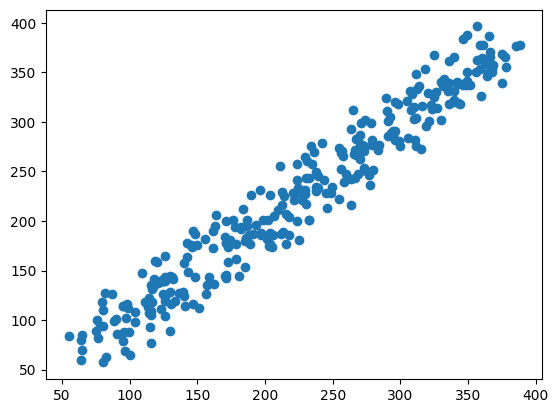

In [ ]:
plt.scatter(datos["X"],datos["Y"])

In [ ]:
X1=np.array([np.ones(len(datos["X"])),datos["X"]])
X1

In [ ]:
B1=datos["Y"]@X1.T@np.linalg.inv(X1@X1.T)
B1

array([9.39323026, 0.96278726])

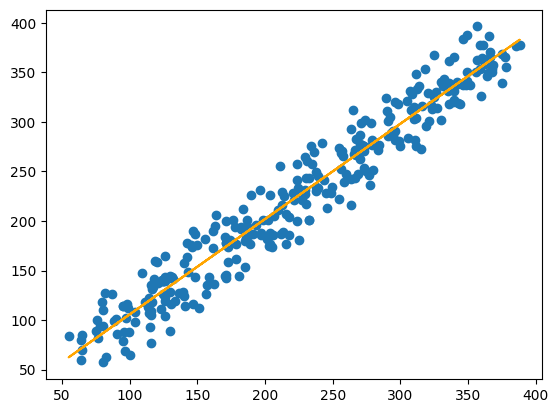

In [ ]:
plt.scatter(datos["X"],datos["Y"])
Y1=B1@X1
plt.plot(datos["X"],Y1,color="Orange")

In [ ]:
np.mean(pow(datos["Y"]-Y1,2))

430.0760710435367

##Ejemplo 3
Una fábrica tiene una máquina que se calienta conforme se utiliza, un ingeniero recolectó la información y la escribió en una tabla

1. Con esta información determine un modelo que describa la temperatura de la maquina en un instante de tiempo $t$.
2. Teniendo en cuenta que por cada grado centígrado que gana la maquina la fábrica tiene que gastar $15um$ (um=Unidades monetarias) construya un modelo de costos.

In [ ]:
#@title Datos
print("El dataset se llama datos y es data frame de pandas.")
t=np.arange(0,20)
T=-5.7*pow(np.e,-0.3*t+4)+315+np.random.rand(len(t))
datos=pd.DataFrame()
datos["tiempo(h)"]=t
datos["Temperatura(c)"]=T
datos

El dataset se llama datos y es data frame de pandas.


,tiempo(h),Temperatura(c)
0,0,4.776445
1,1,85.373978
2,2,144.880023
3,3,189.456606
4,4,222.187625
5,5,245.921036
6,6,264.249442
7,7,277.045250
8,8,287.707137
9,9,294.480254


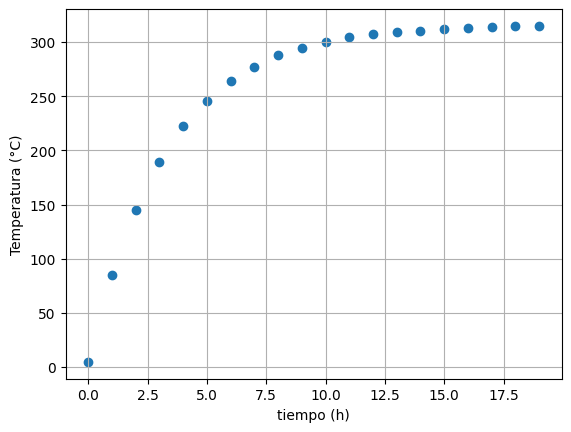

In [ ]:
t=np.array(datos["tiempo(h)"])
T=np.array(datos["Temperatura(c)"])

plt.ylabel("Temperatura (°C)")
plt.xlabel("tiempo (h)")
plt.grid()
plt.scatter(t,T)

La función se parece a una exponencial de signo  negativo en el coeficiente, y en el exponente.

$$y=Ae^{Bt}+c\qquad a,b<0$$

pero la forma de linealizar requere de logaritmos.
$$\ln(y)=\ln(Ae^{Bt}+c)$$
Eso significa que no es posible utilizar este método directamente, por ello se puede utilizar una aproximación de la derivada de la función

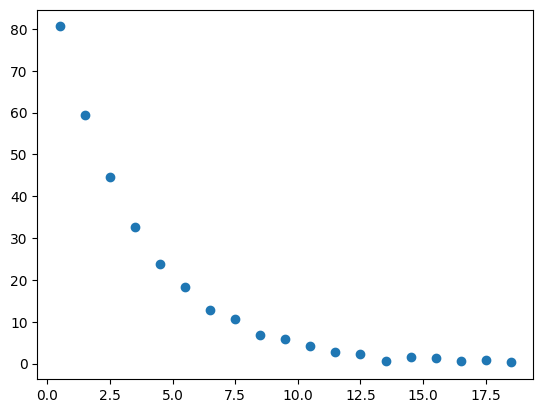

In [ ]:
Tp=np.array([T[i+1]-T[i] for i in range(len(t)-1)])
tp=np.array([(t[i]+t[i+1])/2 for i in range(len(t)-1)])
plt.scatter(tp,Tp)

Ya con esta aproximación ahora no existe el problema del logaritmo de un número negativo.
$$\frac{\partial y}{\partial t}=ABe^{Bt}$$
$$\ln\left(\frac{\partial y}{\partial t}\right)=\ln(AB)+Bt$$

$$Y=\ln\left(\frac{\partial y}{\partial t}\right)$$
$$a=B$$
$$b=\ln(AB)$$
$$X=t$$

$$Y=aX+b$$

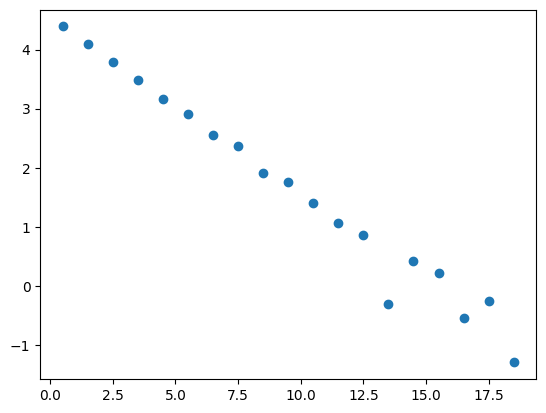

In [ ]:
Y=np.log(Tp)
plt.scatter(tp,Y)

In [ ]:
X=np.array([np.ones(len(tp)),tp])

B1=Y@X.T@np.linalg.inv(X@X.T)
print(B1)
print("ln(AB)=",B1[0],"->AB=",np.exp(B1[0]))
A=np.exp(B1[0])/B1[1]
B=B1[1]
print("B=",B)
print("A=",A)

[ 4.52728141 -0.29914824]
ln(AB)= 4.5272814146832205 ->AB= 92.50673148517046
B= -0.2991482385317873
A= -309.23374959248093


Para el máximo de la función se puede utilizar el último valor registrado de T, pues en ese punto se va a estabilizar la función de acuerdo a:

$$\lim_{x\rightarrow \infty} Ae^{Bt}+C=C,\quad A\leq0 \land B<0$$

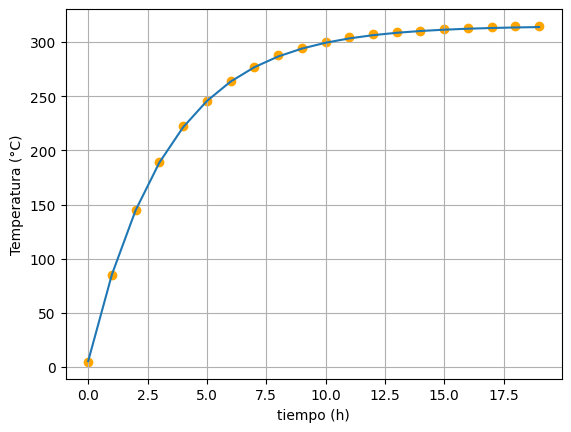

In [ ]:
f=lambda  t: A*np.exp(B*t)+T[-1]

plt.ylabel("Temperatura (°C)")
plt.xlabel("tiempo (h)")
plt.grid()
plt.plot(t,f(t))
plt.scatter(t,T,color="orange")

$$\text{coste unitario}=\$15\cdot\frac{\partial f}{\partial t}$$
$$\text{coste acumulado}=\$15\dot f$$

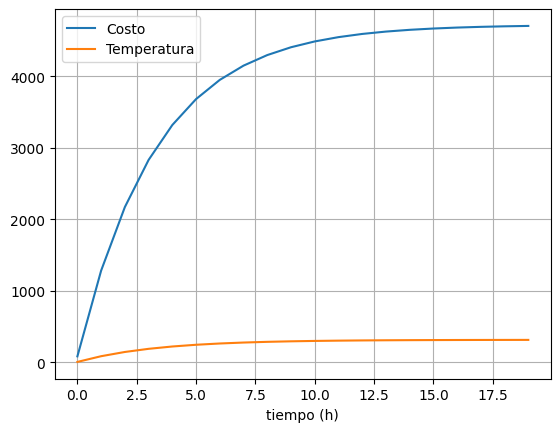

In [ ]:
g=lambda t: 15*f(t)

plt.xlabel("tiempo (h)")
plt.grid()
plt.plot(t,g(t),label="Costo acumulado")
plt.plot(t,f(t),label="Temperatura")
plt.legend()

#Series de tiempo

In [ ]:
#@title Datos
print("El dataset se llama datos y es data frame de pandas.")
t=np.linspace(16,60,25)
v1=15*t+(np.random.rand(len(t))-.5)*500
v2=11*t+(np.random.rand(len(t))-.5)*100
datos=pd.DataFrame()

datos["tiempo(t)"]=t
datos["acciones"]=v1
datos["ventas"]=v2

datos


El dataset se llama datos y es data frame de pandas.


,tiempo(t),acciones,ventas
0,16.000000,292.592916,131.724957
1,17.833333,41.078517,217.240594
2,19.666667,304.370729,189.659490
3,21.500000,171.717251,233.882030
4,23.333333,344.237114,224.980119
5,25.166667,528.151622,255.808802
6,27.000000,347.516472,298.585287
7,28.833333,545.491230,336.092038
8,30.666667,640.789021,369.867597
9,32.500000,309.920569,325.167320


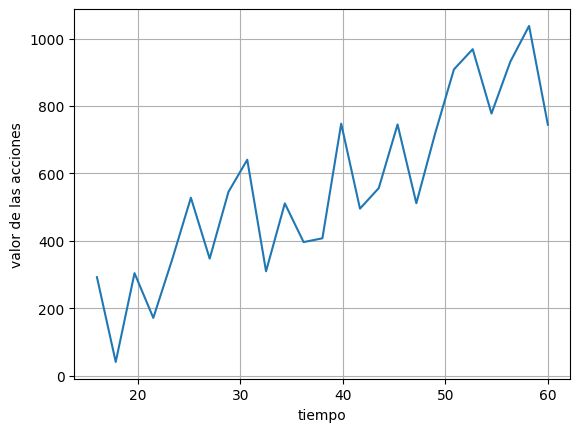

In [ ]:
t=datos["tiempo(t)"]
y=datos["acciones"]

plt.grid()
plt.xlabel("tiempo")
plt.ylabel("valor de las acciones")
plt.plot(t,y)

In [ ]:
n=2
T=t[n:-n]
Y=[np.mean(y[i-n:n+i+1]) for i in range(n,len(y)-n)]

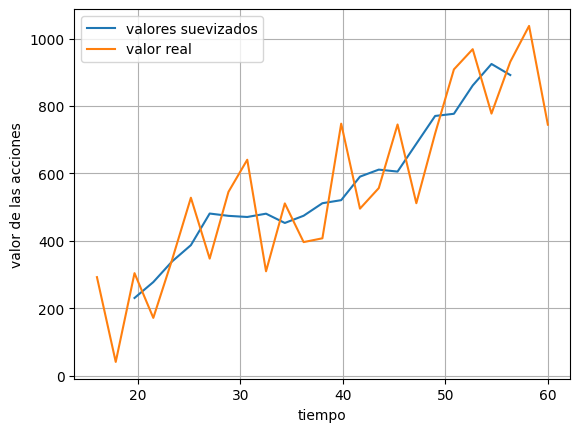

In [ ]:
plt.grid()
plt.xlabel("tiempo")
plt.ylabel("valor de las acciones")
plt.plot(T,Y,label="valores suevizados")
plt.plot(t,y,label="valor real")
plt.legend()

##Modelo AR

In [ ]:
#@title Datos
print("El dataset se llama datos y es data frame de pandas.")
t=np.arange(0,20)
T=-5.7*pow(np.e,-0.3*t+4)+315+np.random.rand(len(t))
datos=pd.DataFrame()
datos["tiempo(h)"]=t
datos["Temperatura(c)"]=T
datos

El dataset se llama datos y es data frame de pandas.


,tiempo(h),Temperatura(c)
0,0,4.592971
1,1,84.577553
2,2,144.863768
3,3,189.005562
4,4,221.467074
5,5,245.798560
6,6,264.063235
7,7,277.579533
8,8,287.469150
9,9,294.805172


In [ ]:
D=datos.sort_values("tiempo(h)",ascending=False)

In [ ]:
q=[]
n=4
for i in range(len(D)-n):
  q.append(list(D["Temperatura(c)"])[i:i+n])
q=np.array(q,dtype="float64")
print(q)

[[314.48735516 313.9637531  313.80038491 312.97282086]
 [313.9637531  313.80038491 312.97282086 311.73132214]
 [313.80038491 312.97282086 311.73132214 311.02733458]
 [312.97282086 311.73132214 311.02733458 308.97261316]
 [311.73132214 311.02733458 308.97261316 306.99380734]
 [311.02733458 308.97261316 306.99380734 303.81217183]
 [308.97261316 306.99380734 303.81217183 300.25454573]
 [306.99380734 303.81217183 300.25454573 294.80517162]
 [303.81217183 300.25454573 294.80517162 287.46915028]
 [300.25454573 294.80517162 287.46915028 277.57953267]
 [294.80517162 287.46915028 277.57953267 264.06323536]
 [287.46915028 277.57953267 264.06323536 245.7985598 ]
 [277.57953267 264.06323536 245.7985598  221.46707432]
 [264.06323536 245.7985598  221.46707432 189.00556181]
 [245.7985598  221.46707432 189.00556181 144.86376838]
 [221.46707432 189.00556181 144.86376838  84.57755284]]


In [ ]:
Y=q.T[0]
X=q.T[1:].T
X=np.block([[np.ones(len(X))],[X.T]])

In [ ]:
B1=Y@X.T@np.linalg.inv(X@X.T)

In [ ]:
plt.plot(B1@X)
plt.plot(Y)

#SciPy

Es una librería de uso científico y matematico.

###Ajustar curva

Muchas veces uno busca ajustar una curva a un conjunto de datos, para eso scipy tiene el módulo `optimize` el cual trae varios métodos de optimización, entre ellos el `sp.curve_fit()`

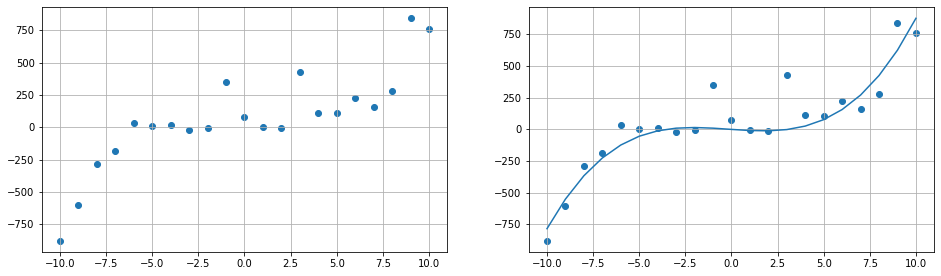

In [ ]:
from scipy import optimize
import matplotlib.pyplot as plt

x=np.linspace(-10,10,21)

f=lambda x: pow(x,3)-6*pow(x,2)+2*x

f1=lambda x,a,b,c: a*pow(x,3)+b*pow(x,2)+c*x

y=f(x+1)+np.random.rand(len(x))*500

coef=optimize.curve_fit(f1,x,y)[0]

plt.figure(figsize=(16,4.5))

plt.subplot(1,2,1)
plt.scatter(x,y)
plt.grid()

plt.subplot(1,2,2)
plt.scatter(x,y)
plt.plot(x,f1(x,coef[0],coef[1],coef[2]))
plt.grid()
plt.show()
